In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context='talk', style='ticks',
        color_codes=True, rc={'legend.frameon': False})

%matplotlib inline

In [2]:
data1 = pd.read_csv('/projects/rlmolecule/pgorai/nrelmatdb_icsd.csv')
data2 = pd.read_csv('/projects/rlmolecule/pgorai/nrelmatdb_icsd2.csv')

# Internal data consistency checks

Here I'm looking at NREL MatDB vs the new calculations that Prashun did. The original NRELMatDB contains a lot of duplicated ICSD entries. In blue is a plot of each ICSD energy, vs. the minimum energy for that ICSD on the x-axis. In red is a plot of the minimum ICSD energy from dataset 1 (NRELMatDB) vs the new energy obtained from Prashun's calculations. This shows that (1) there is a big spread in the computed energies in NRELMatDB; and that Prashun's new energies are consistently lower-energy than the minimum energies found in NRELMatDB

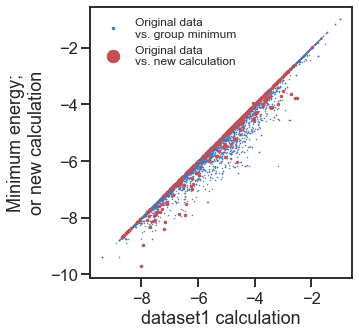

In [3]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, aspect='equal')

dupes = np.concatenate(data1[data1.icsdnum.duplicated(keep=False)].groupby('icsdnum').energyperatom.apply(lambda x: np.vstack([x, np.tile(x.min(), len(x))]).T).values.tolist())
plt.plot(dupes[:, 0], dupes[:, 1], '.', ms=1, label='Original data\nvs. group minimum')

plt.plot(data1.sort_values('energyperatom').drop_duplicates(subset='icsdnum', keep='first').set_index('icsdnum').reindex(data2.icsdnum).energyperatom,
         data2.energyperatom, '.', color='r', ms=5, label='Original data\nvs. new calculation')

plt.ylabel('Minimum energy;\nor new calculation')
plt.xlabel('dataset1 calculation')

plt.legend(loc='upper left', markerscale=5, fontsize=12)

### We'd need to do this many new calculations to improve the original dataset

In [4]:
data1_dedupe = data1.sort_values('energyperatom').drop_duplicates(subset='icsdnum', keep='first')
len(data1_dedupe[~data1_dedupe.icsdnum.isin(data2.icsdnum)])

13968

## Looking at materials project data

Next we'll look at data from the Materials project that Shubham downloaded

In [5]:
mp_data = pd.read_csv('/projects/rlmolecule/pstjohn/materials_data/mp_46744.csv')

In [6]:
mp_with_icsd = mp_data.dropna().copy()
mp_with_icsd['icsd_ids'] = mp_with_icsd.icsd_ids.astype(int)
mp_with_icsd.rename(columns={'icsd_ids': 'icsdnum'}, inplace=True)

In [7]:
mp_with_icsd.icsdnum.isin(data2.icsdnum).sum()

1814

In [8]:
mp_with_icsd.icsdnum.isin(data1.icsdnum).sum()

6061

Text(0, 0.5, 'materials project calculation')

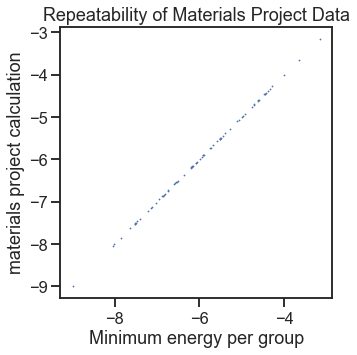

In [9]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, aspect='equal')

dupes = np.concatenate(mp_with_icsd[mp_with_icsd.icsdnum.duplicated(keep=False)].groupby('icsdnum').energyperatom.apply(
    lambda x: np.vstack([x, np.tile(x.min(), len(x))]).T).values.tolist())
plt.plot(dupes[:, 0], dupes[:, 1], '.', ms=1, label='Original data\nvs. group minimum')

plt.title('Repeatability of Materials Project Data')
plt.xlabel('Minimum energy per group')
plt.ylabel('materials project calculation')

The plot above is the same plot as shown above for the NRELMatDB data, but there are few duplicated ICSDs in the Materials project database. Regardless, the spread is much tighter here than for the NRELMatDB data.

Text(0, 0.5, 'MatDB dataset1 calculation')

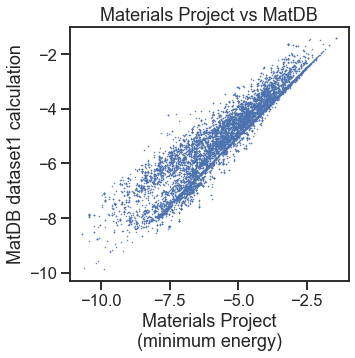

In [10]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, aspect='equal')

plt.plot(mp_with_icsd.sort_values('energyperatom').drop_duplicates(subset='icsdnum', keep='first').set_index(
    'icsdnum').reindex(data1.icsdnum).energyperatom, data1.energyperatom, '.', ms=1)

plt.title('Materials Project vs MatDB')
plt.xlabel('Materials Project\n(minimum energy)')
plt.ylabel('MatDB dataset1 calculation')

Here I look at the minimum energy from the materials project vs. NREL MatDB (the new data). This is a big spread, and the materials project data is usually lower-energy.

Text(0, 0.5, 'MatDB dataset1 (minimum energy)')

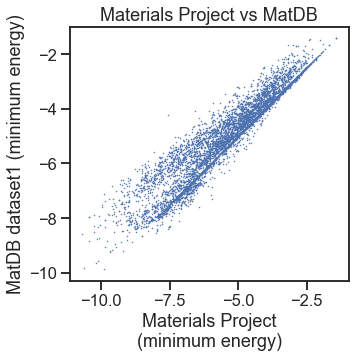

In [16]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, aspect='equal')

plt.plot(mp_with_icsd.sort_values('energyperatom').drop_duplicates(subset='icsdnum', keep='first').set_index(
    'icsdnum').reindex(data1_dedupe.icsdnum).energyperatom, data1_dedupe.energyperatom, '.', ms=1)

plt.title('Materials Project vs MatDB')
plt.xlabel('Materials Project\n(minimum energy)')
plt.ylabel('MatDB dataset1 (minimum energy)')

This is still the case even when we only look at the group-minimum data from dataset 1

Text(0, 0.5, 'MatDB dataset2 calculation')

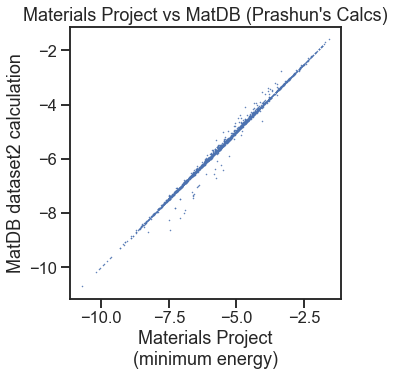

In [11]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, aspect='equal')

plt.plot(mp_with_icsd.sort_values('energyperatom').drop_duplicates(subset='icsdnum', keep='first').set_index(
    'icsdnum').reindex(data2.icsdnum).energyperatom, data2.energyperatom, '.', ms=1)

plt.title("Materials Project vs MatDB (Prashun's Calcs)")
plt.xlabel('Materials Project\n(minimum energy)')
plt.ylabel('MatDB dataset2 calculation')

This is the same plot, but for prashun's new calculations. The spread here is much closer; and for several molecules Prashun gets a lower energy per atom than Materials Project

In [12]:
data1_dedupe[~data1_dedupe.icsdnum.isin(mp_with_icsd.icsdnum)]

,#sortedformula,icsdnum,initialspacegroupnum,numatom,energyperatom,enthalpy,minenergyid,mident
16936,Hf N,183419,225,2,-9.854908,-1.90106011942,106923,106923
3991,Hf N,167875,216,2,-9.663267,-1.70941961942,107755,107755
17381,Hf O2,71354,61,24,-9.608091,-3.96885932961,109233,109233
4384,Hf O2,173967,225,3,-9.573228,-3.93399607961,110550,110550
5191,C W,246150,187,2,-9.535068,None,88304,88304
...,...,...,...,...,...,...,...,...
13014,K,27349,221,1,-0.971336,-0.166343972449,85449,85449
722,Br,168177,225,1,-0.963281,None,87550,87550
12874,Cl,62248,225,1,-0.916325,0.70991871353,84906,84906
12695,Ag,43821,225,1,-0.690940,0.136069585416,84031,84031


If we don't trust NREL MatDB; but do trust Materials Project and Prashun's new calcs, we'd need to perform 8205 new optimizations to replace the original NREL MatDB's coverage

In [17]:
mp_data = pd.read_csv('/projects/rlmolecule/pstjohn/materials_data/mp_46744.csv')

In [40]:
mp_data

,icsd_ids,mpid,energyperatom,prettyformula,spacegroup,nsites
32439,646770.0,mp-929446,-6.423900,ThNiSn,216,3
1315,190660.0,mp-727847,-5.742954,CaAs2(HO2)4,2,30
12526,77899.0,mp-911239,-6.675392,Th(SiPd)2,139,5
36801,55541.0,mp-991321,-8.079863,Nd3Fe29,12,32
16670,NaN,mp-855378,-7.730345,K3Li2Nb5O15,100,50
...,...,...,...,...,...,...
44275,NaN,mp-663150,-3.310882,Yb(MgSb)2,164,5
27106,83969.0,mp-671013,-5.227650,Ba2V(CuS2)3,15,24
34852,NaN,mp-768142,-7.812352,Li13Nb14ZnO42,1,70
37379,78840.0,mp-566456,-7.034180,KMnPO4,2,28


In [22]:
mp_data = mp_data.sort_values('energyperatom').drop_duplicates(
    subset='mpid', keep='first').sample(frac=1., random_state=1)

In [28]:
import os

In [38]:
# Read energy data
data = pd.read_csv('/projects/rlmolecule/pstjohn/materials_data/mp_46744.csv')

data = data.sort_values('energyperatom').drop_duplicates(
    subset='mpid', keep='first').sample(frac=1., random_state=1)

# So pymatgen doesn't want to take the ISO-8859-1 cifs in the tarball, I have to 
# re-encode as utf-8 using the following command:
# for file in *; do iconv -f ISO-8859-1 -t UTF-8 < $file > "../utf8_cifs/$file"; done
cif_file = lambda x: '/projects/rlmolecule/pstjohn/materials_project_cifs/{}.cif.gz'.format(x)
cif_exists = lambda x: os.path.exists(cif_file(x))
data['cif_exists'] = data.mpid.apply(cif_exists)
# data = data[data.cif_exists]

In [39]:
data[~data.cif_exists]

,icsd_ids,mpid,energyperatom,prettyformula,spacegroup,nsites,cif_exists
